In [1]:
import pandas as pd


In [2]:
file_path = 'eu_bdt-ud-dev.conllu'

# Read the CoNLL-U file into a list of lists
data = []
with open(file_path, 'r') as f:
    for line in f:
        if not (line == '' or line.startswith('#')):
            fields = line.strip().split('\t')
            data.append([field.lower() if i < 3 else field for i, field in enumerate(fields)])

In [3]:
# Pad rows with fewer than 10 columns with empty strings
for i in range(len(data)):
	while len(data[i]) < 10:
		data[i].append('')

# Convert the list of lists into a Pandas DataFrame
df = pd.DataFrame(data)
df.columns = ['id', 'form', 'lemma', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc']

In [4]:
print('Number of rows:', len(df))
print('Number of unique lemmas:', df['lemma'].nunique())
print('Average length of form and lemma strings:', (df['form'].str.len().mean() + df['lemma'].str.len().mean()) / 2)


Number of rows: 25893
Number of unique lemmas: 4687
Average length of form and lemma strings: 4.839551230062179


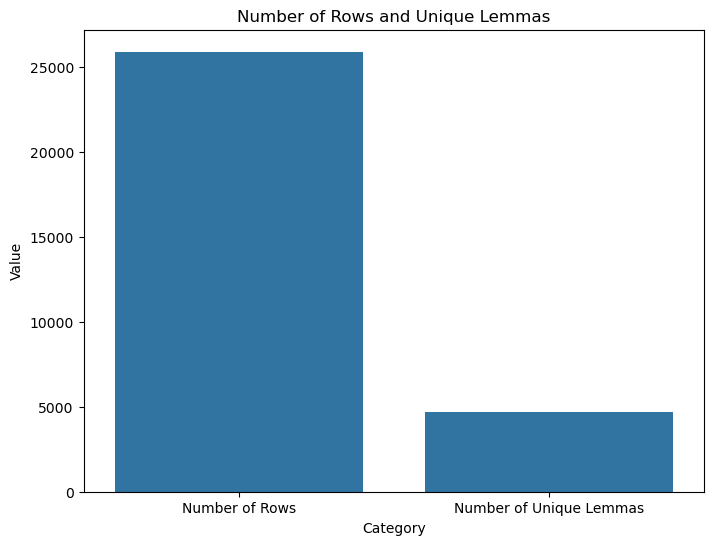

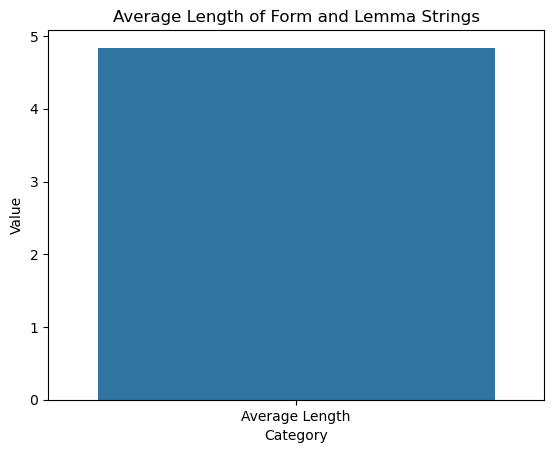

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Data from your code
num_rows = len(df)
unique_lemmas = df['lemma'].nunique()
avg_length = (df['form'].str.len().mean() + df['lemma'].str.len().mean()) / 2
# Create bar plot for number of rows and unique lemmas
plt.figure(figsize=(8, 6))
sns.barplot(x=['Number of Rows', 'Number of Unique Lemmas'], y=[num_rows, unique_lemmas])
plt.title('Number of Rows and Unique Lemmas')
plt.xticks([0, 1], ['Number of Rows', 'Number of Unique Lemmas'])
plt.ylabel('Value')
plt.xlabel('Category')
plt.show()
# Create bar plot for average length of form and lemma strings
avg_length_plot = sns.barplot(x=['Average Length'], y=[avg_length])
plt.title('Average Length of Form and Lemma Strings')
plt.xticks([0], ['Average Length'])
plt.ylabel('Value')
plt.xlabel('Category')
plt.show()


In [6]:
def convert_underscore(input_value):
  """Converts values containing underscores to missing data."""
  if input_value == '_':
    return float('nan') # or return None in some languages
  else:
    return input_value


In [7]:
df['feats'] = df['feats'].apply(lambda x: '' if pd.isna(convert_underscore(x)) else convert_underscore(x))

In [8]:
threshold = 0.8 * len(df)
df = df.dropna(axis=1, thresh=threshold)

print(df.columns)

Index(['id', 'form', 'lemma', 'upos', 'xpos', 'feats', 'head', 'deprel',
       'deps', 'misc'],
      dtype='object')


In [9]:
df_reduced = df[df['lemma'].isin(['izan', 'ukan'])]

print(df_reduced.head())
print(len(df_reduced))

    id  form lemma  upos xpos  \
7    8  izan  izan  VERB    _   
16   6    da  izan   AUX    _   
31  12   zen  izan   AUX    _   
37   4   den  izan   AUX    _   
43   2  izan  izan  VERB    _   

                                                feats head deprel deps  \
7                           Aspect=Perf|VerbForm=Part    0   root    _   
16  Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbFo...    5    aux    _   
31  Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbFo...   11    aux    _   
37  Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbFo...    3    aux    _   
43                          Aspect=Perf|VerbForm=Part    4    acl    _   

             misc  
7               _  
16              _  
31  SpaceAfter=No  
37              _  
43              _  
1707


In [10]:
import re

# Extract all 'feats' values from the reduced DataFrame
all_feats = df_reduced['feats'].tolist()

# Combine all features into a single string
combined_feats = ' '.join(all_feats)

# Use regular expression to find unique morphological features
unique_features = set(re.findall(r'([A-Za-z]+=[A-Za-z]+)', combined_feats))

# Print the unique morphological features
print("Unique Morphological Features:")
for feature in unique_features:
    print(feature)


Unique Morphological Features:
Number=Plur
Polarity=Pos
Aspect=Prosp
Case=Cau
Gender=Masc
Case=Abs
Number=Sing
Case=Gen
Mood=Cnd
Aspect=Perf
Mood=Ind
Gender=Fem
VerbForm=Fin
Case=Ben
Definite=Ind
Case=Abl
Case=Ins
Case=All
Case=Ine
Case=Loc
VerbForm=Inf
Definite=Def
Aspect=Prog
Polite=Infm
Aspect=Imp
Case=Erg
VerbForm=Part
Case=Dat


In [11]:
from collections import Counter

# Split the 'feats' column into individual features
all_features = []
for feats_str in df['feats']:
    if feats_str:
        features = feats_str.split('|')
        all_features.extend(features)

# Count the occurrences of each feature
feature_counts = Counter(all_features)

# Identify features that occur less than 50 times
infrequent_features = {feature: count for feature, count in feature_counts.items() if count < 50}

# Create a set of infrequent features for faster lookup
infrequent_features_set = set(infrequent_features.keys())

# Function to remove infrequent features from a 'feats' string
def remove_infrequent_features(feats_str):
    if not feats_str:
        return ''
    features = feats_str.split('|')
    frequent_features = [feature for feature in features if feature not in infrequent_features_set]
    return '|'.join(frequent_features)

# Apply the function to the 'feats' column
df['feats'] = df['feats'].apply(remove_infrequent_features)

# Print the updated DataFrame information
print(df.head())

  id      form   lemma   upos xpos                              feats head  \
0  1  atenasen  atenas  PROPN    _  Case=Ine|Definite=Def|Number=Sing    8   
1  2     ordea   ordea  CCONJ    _                                       8   
2  3         ,       ,  PUNCT    _                                       2   
3  4     beste   beste    DET    _                                       6   
4  5      bost    bost    NUM    _                       NumType=Card    6   

   deprel deps           misc  
0     obl    _              _  
1  advmod    _  SpaceAfter=No  
2   punct    _              _  
3     det    _              _  
4  nummod    _              _  
